In [1]:
%matplotlib inline
import control as co
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

- O valor de alpha está diretamente relacionado ao overshoot do sistema.
- Quanto mais para a esquerda, menor seu efeito no sistema original. Porém quanto mais próximo de 1, maior o overshoot do sistema.

# Sub amortecido (0 < zeta < 1)

In [2]:
wn = 5
zeta = 0.3
alpha = 1

In [3]:
zero = co.tf([1/(alpha*zeta*wn), 1], [1])
ft = co.tf([1],[1/(wn**2), 2*zeta/wn, 1])

In [4]:
zero


0.6667 s + 1
------------
      1

In [5]:
ft


          1
---------------------
0.04 s^2 + 0.12 s + 1

In [6]:
final_ft = zero * ft

In [7]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(final_ft, interval)

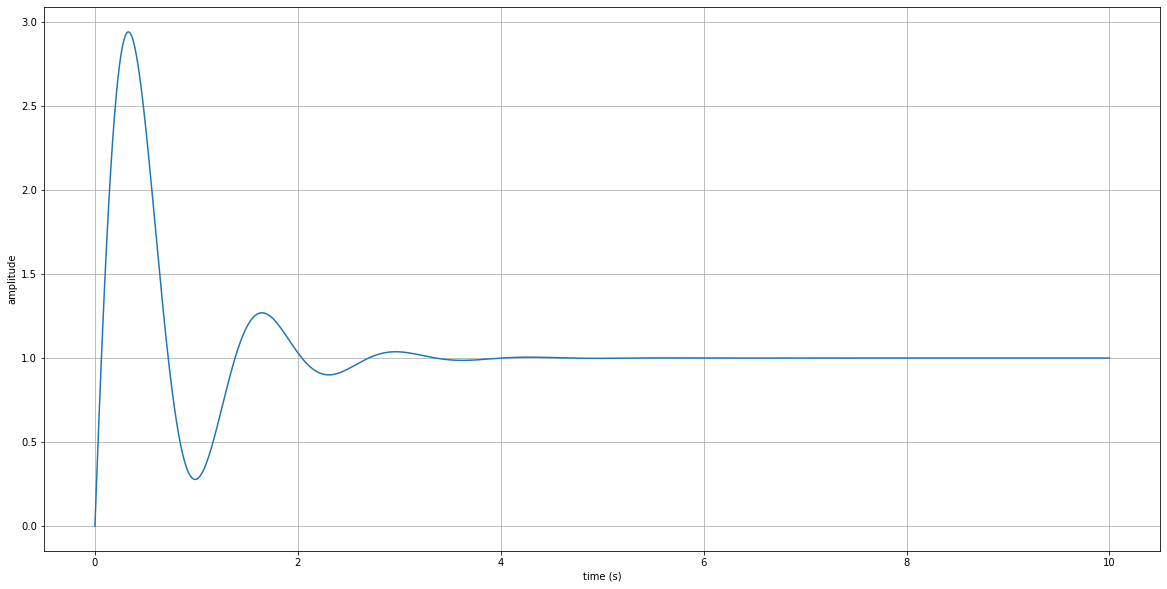

In [8]:
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()

# Criticamente amortecido (zeta = 1)

- Neste caso, adicionar um zero não tem efeito.

In [9]:
wn = 5
zeta = 1
alpha = 1

In [10]:
zero = co.tf([1/(alpha*zeta*wn), 1], [1])
ft = co.tf([1],[1/(wn**2), 2*zeta/wn, 1])

In [11]:
ft


          1
--------------------
0.04 s^2 + 0.4 s + 1

In [12]:
zero


0.2 s + 1
---------
    1

In [13]:
final_ft = zero * ft

In [14]:
final_ft


      0.2 s + 1
--------------------
0.04 s^2 + 0.4 s + 1

In [15]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(final_ft, interval)

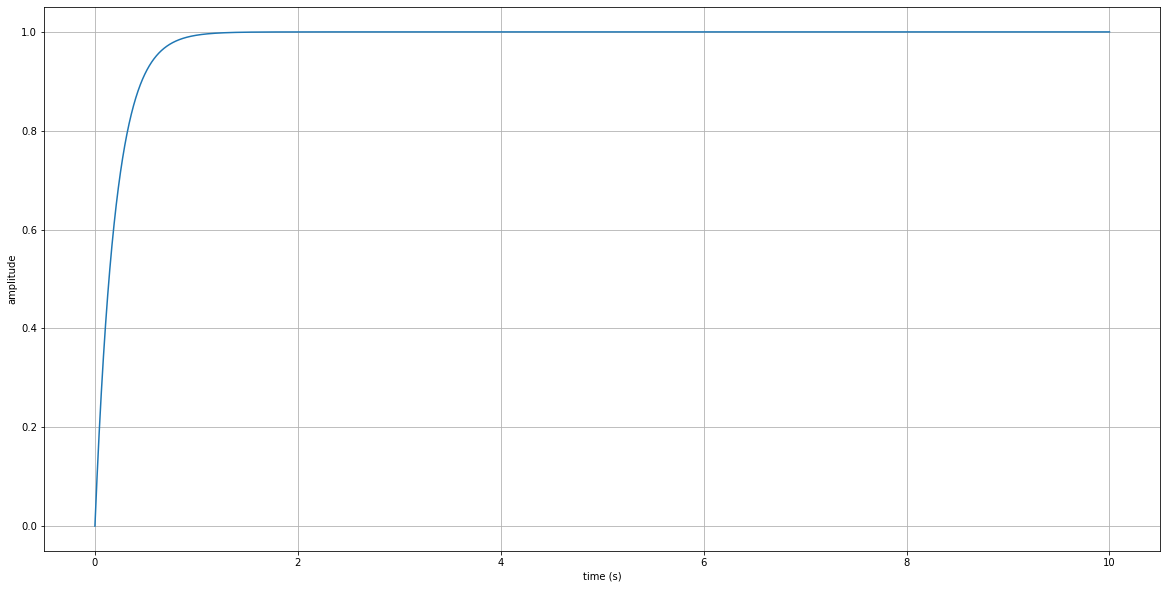

In [16]:
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()

# Sobreamortecido (zeta > 1)

- Idem para o caso anterior.
- Deve ser consequência da transformada de Laplace e da expansão de frações parciais;

In [17]:
wn = 5
zeta = 5
alpha = 1

In [18]:
zero = co.tf([1/(alpha*zeta*wn), 1], [1])
ft = co.tf([1],[1/(wn**2), 2*zeta/wn, 1])

In [19]:
ft


        1
------------------
0.04 s^2 + 2 s + 1

In [20]:
zero


0.04 s + 1
----------
    1

In [21]:
final_ft = zero * ft

In [22]:
interval = np.linspace(0, 10, 10000)
t, y = co.step_response(final_ft, interval)

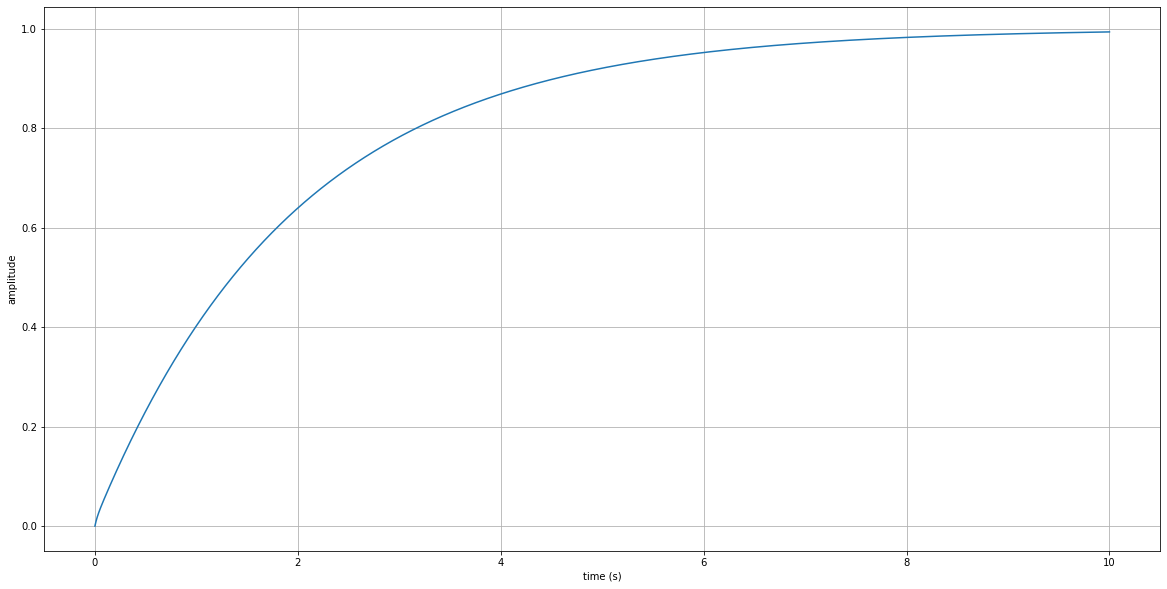

In [23]:
plt.plot(t, y)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.grid()